<a href="https://colab.research.google.com/github/gabrielgazito/Challenge1_Data_Science_Alura/blob/main/Relatorio_AluraStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 📚 Análise de Dados - Desafio Alura Store

Este notebook tem como objetivo analisar o desempenho de quatro lojas pertencentes à rede Alura Store, para auxiliar o Sr. João a decidir qual loja vender.
As métricas principais analisadas são:
- Faturamento total
- Produtos mais e menos vendidos
- Avaliação média dos clientes
- Custo médio do frete
- Ticket médio


### Importação dos dados



In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

lojas = [loja, loja2, loja3, loja4]
loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


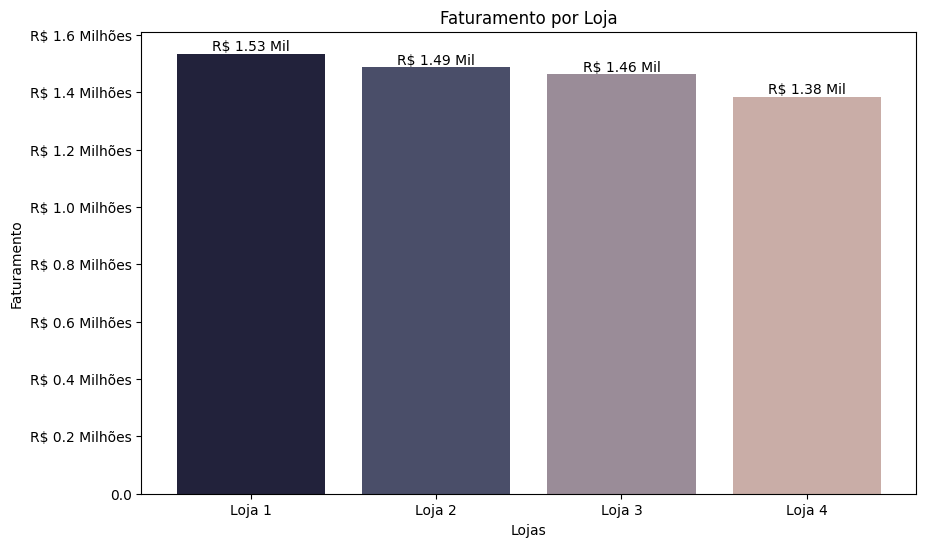

,Faturamento
Loja 1,1534509.12
Loja 2,1488459.06
Loja 3,1464025.03
Loja 4,1384497.58


In [75]:
faturamento_loja1 = sum(loja['Preço'])
faturamento_loja2 = sum(loja2['Preço'])
faturamento_loja3 = sum(loja3['Preço'])
faturamento_loja4 = sum(loja4['Preço'])

faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas_nome = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

plt.figure(figsize=(10, 6))
barras = plt.bar(lojas_nome, faturamentos, color= ['#22223B', '#4A4E69', '#9A8C98', '#C9ADA7'])
plt.xticks(rotation=0)
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.title('Faturamento por Loja')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'R$ {x/1_000_000:.1f} Milhões'if x > 0 else f'{x/1_000_000:.1f}'))
plt.gca().bar_label(barras, labels= (f'R$ {v/1_000_000:.2f} Mil' for v in faturamentos))
plt.show()

df_faturamentos = pd.DataFrame(faturamentos, index=lojas_nome, columns=['Faturamento'])
df_faturamentos


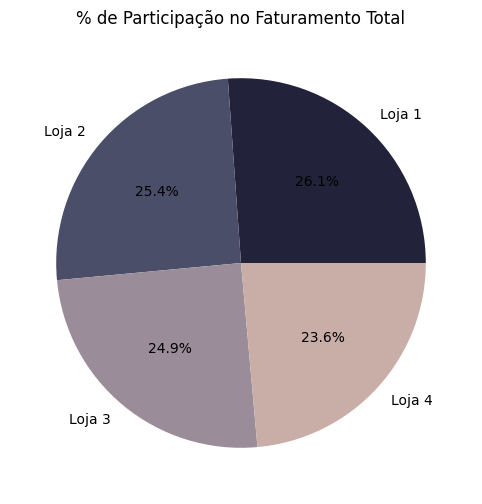

In [76]:
plt.figure(figsize=(10, 6))
plt.pie(faturamentos, labels=lojas_nome, autopct='%1.1f%%', colors= ['#22223B', '#4A4E69', '#9A8C98', '#C9ADA7'])
plt.title('% de Participação no Faturamento Total')
plt.show()

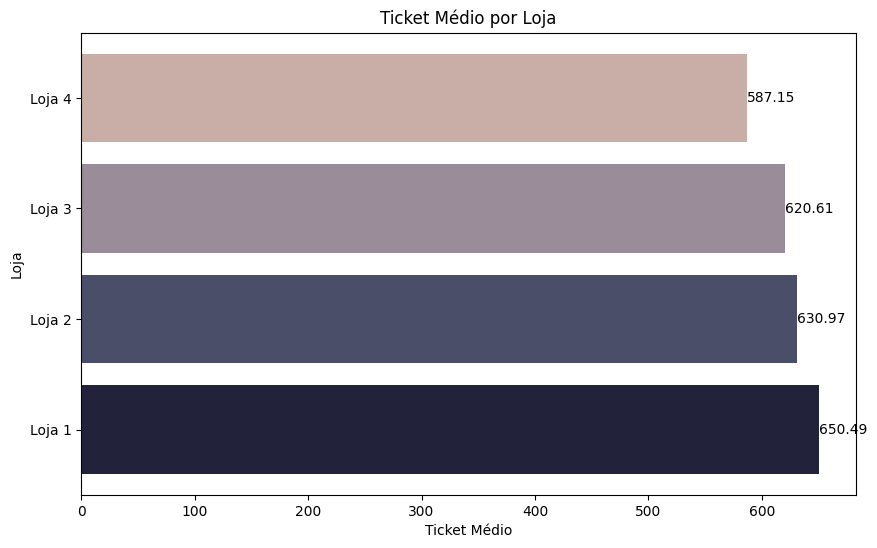

In [77]:
# prompt: faça um gráfico de barras horizontal em ordem de valor que mostre um dataframe de ticket  médio (faturamento total  de loja/ pedidos totais da loka) arredonde por 2 casas decimais os valores do ticket médio no dataframe, gere um dataframe em ordem de valores, coloque os rótulos das barras

import pandas as pd
import matplotlib.pyplot as plt

# Calculate ticket médio for each store
ticket_medio_loja1 = round(faturamento_loja1 / len(loja), 2)
ticket_medio_loja2 = round(faturamento_loja2 / len(loja2), 2)
ticket_medio_loja3 = round(faturamento_loja3 / len(loja3), 2)
ticket_medio_loja4 = round(faturamento_loja4 / len(loja4), 2)

# Create a DataFrame
ticket_medio_data = {
    'Loja': lojas_nome,
    'Ticket Médio': [ticket_medio_loja1, ticket_medio_loja2, ticket_medio_loja3, ticket_medio_loja4]
}
df_ticket_medio = pd.DataFrame(ticket_medio_data)

# Sort the DataFrame by Ticket Médio

# Create the horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(df_ticket_medio['Loja'], df_ticket_medio['Ticket Médio'], color= ['#22223B', '#4A4E69', '#9A8C98', '#C9ADA7'])
plt.xlabel('Ticket Médio')
plt.ylabel('Loja')
plt.title('Ticket Médio por Loja')

# Add labels to the bars
for index, value in enumerate(df_ticket_medio['Ticket Médio']):
    plt.text(value, index, str(value), va='center')
df_ticket_medio

plt.show()


# 2. Vendas por Categoria


In [78]:
vendas_por_categoria = {}
def vendas_categoria(loja):
  return loja.groupby('Categoria do Produto')['Preço'].sum().round(2)

cat1 = vendas_categoria(loja)
cat2 = vendas_categoria(loja2)
cat3 = vendas_categoria(loja3)
cat4 = vendas_categoria(loja4)

vendas_por_categoria['Loja 1'] = cat1
vendas_por_categoria['Loja 2'] = cat2
vendas_por_categoria['Loja 3'] = cat3
vendas_por_categoria['Loja 4'] = cat4


<Figure size 1000x600 with 0 Axes>

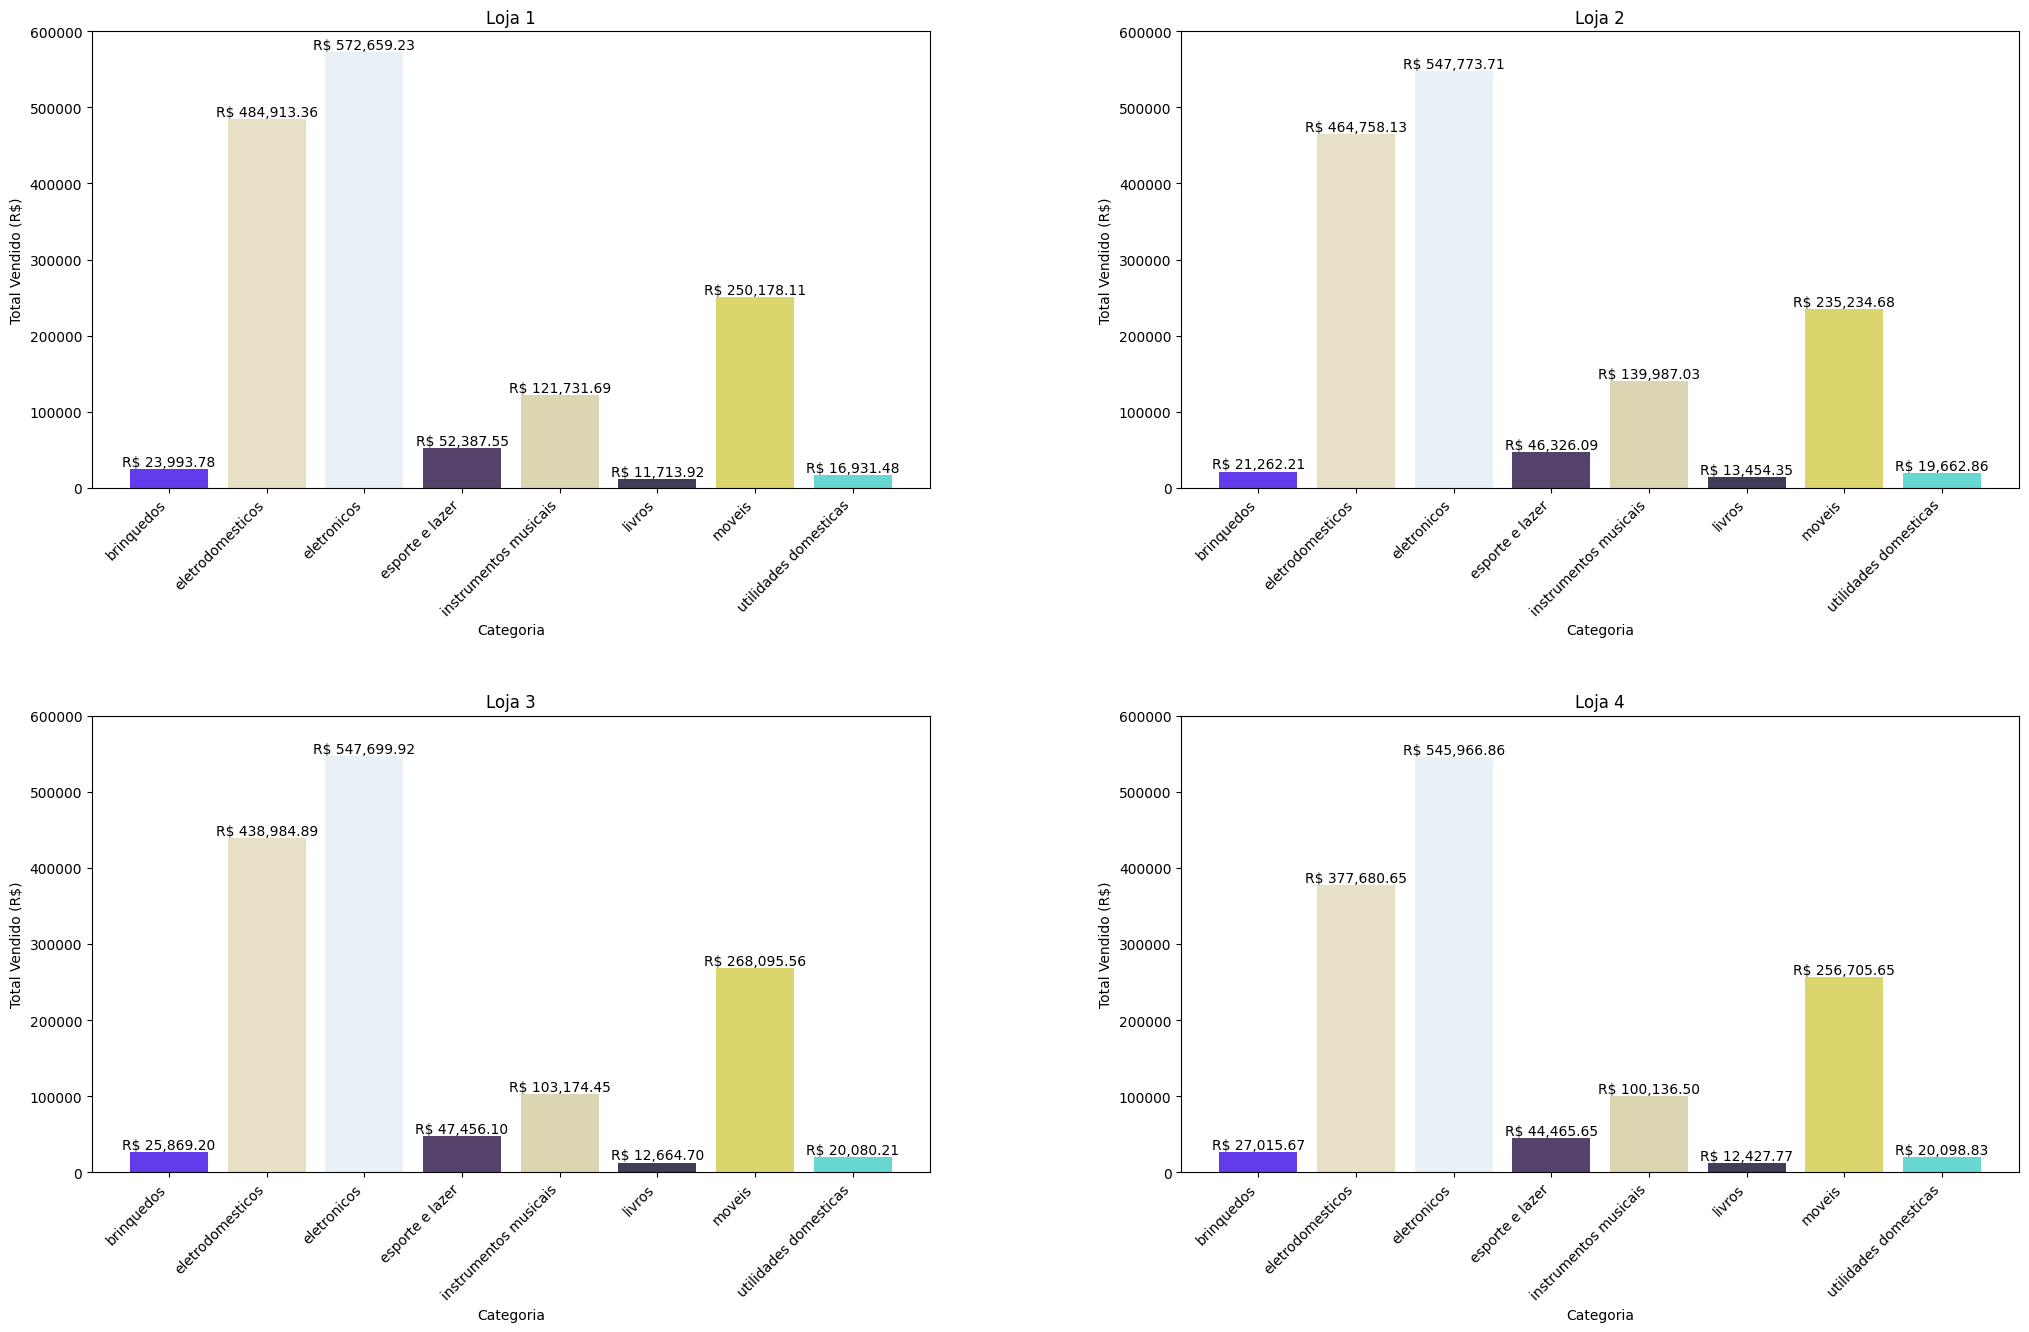

In [79]:
plt.figure(figsize=(10, 6))

colors = [
    '#623CEA',  # brinquedos
    '#E7DFC6',  # eletrodomesticos
    '#E9F1F7',  # eletronicos
    '#54426B',  # esporte e lazer
    '#DBD5B2',  # instrumentos musicais
    '#403D58',  # livros
    '#DBD56E',  # moveis
    '#66D7D1'   # utilidades domesticas
]

fig, axes = plt.subplots(figsize=(20, 12), nrows=2, ncols=2)
plt.tight_layout()

loja_index = 0
axes = axes.flatten()
for loja in vendas_por_categoria:
    valores  = vendas_por_categoria[loja]
    categorias = valores.index


    barra = axes[loja_index].bar(categorias, valores, color=colors)
    axes[loja_index].bar_label(barra, labels= (f'R$ {v:,.2f}' for v in valores))
    axes[loja_index].set_title(loja)
    axes[loja_index].set_ylabel('Total Vendido (R$)')
    axes[loja_index].set_xlabel('Categoria')
    axes[loja_index].set_ylim(0, 600000)

    plt.setp(axes[loja_index].get_xticklabels(), rotation=45, ha='right')

    loja_index += 1
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

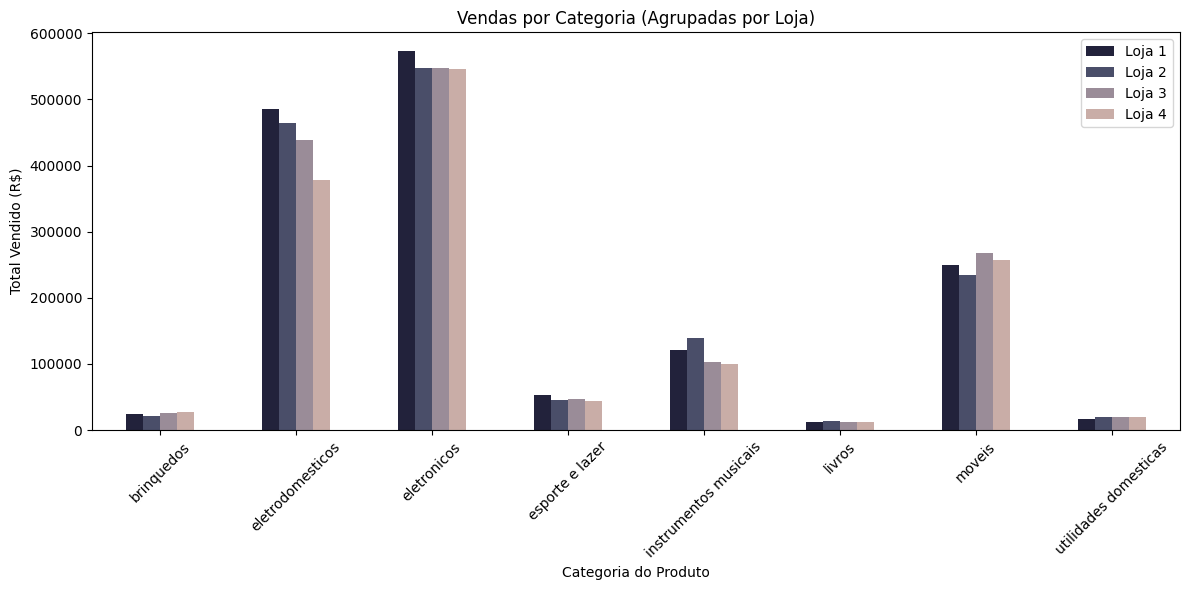

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,23993.78,21262.21,25869.20,27015.67
eletrodomesticos,484913.36,464758.13,438984.89,377680.65
eletronicos,572659.23,547773.71,547699.92,545966.86
esporte e lazer,52387.55,46326.09,47456.10,44465.65
instrumentos musicais,121731.69,139987.03,103174.45,100136.50
livros,11713.92,13454.35,12664.70,12427.77
moveis,250178.11,235234.68,268095.56,256705.65
utilidades domesticas,16931.48,19662.86,20080.21,20098.83


In [80]:
# Criar um dicionário com os dados das vendas por categoria para cada loja
vendas_por_categoria = {}
for i, loja in enumerate(lojas, 1):
    vendas_por_categoria[f'Loja {i}'] = loja.groupby('Categoria do Produto')['Preço'].sum().round(2)

# Criar um DataFrame a partir do dicionário
df_vendas = pd.DataFrame(vendas_por_categoria)
cores = ['#22223B', '#4A4E69', '#9A8C98', '#C9ADA7']
# Plotar o gráfico de barras agrupadas lado a lado
ax = df_vendas.plot.bar(figsize=(12, 6), rot=45, color=cores)

# Configurar o gráfico
ax.set_ylabel('Total Vendido (R$)')
ax.set_title('Vendas por Categoria (Agrupadas por Loja)')
plt.tight_layout()  # Ajustar o layout para evitar sobreposição de elementos
plt.show()

df_vendas

# 3. Média de Avaliação das Lojas

In [81]:
media_avaliacao = []
for i, loja in enumerate(lojas):
  media_avaliacao.append(round(np.average(loja['Avaliação da compra']), 2))
  medias_lojas = pd.DataFrame(media_avaliacao, columns=['Média de Avaliação'])
medias_lojas.index = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
medias_lojas


,Média de Avaliação
Loja 1,3.98
Loja 2,4.04
Loja 3,4.05
Loja 4,4.00


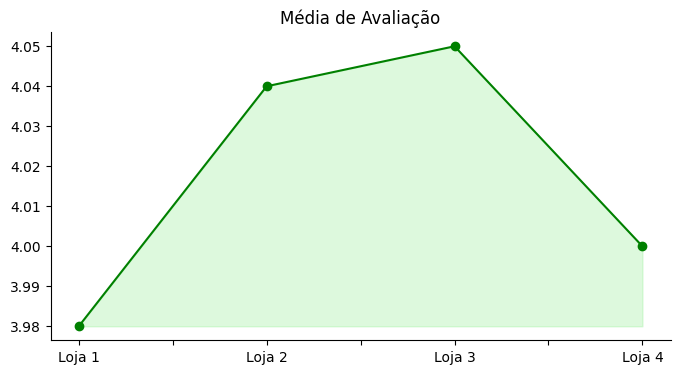

In [82]:
import matplotlib.pyplot as plt
medias_lojas['Média de Avaliação'].plot(kind='line', figsize=(8, 4), title='Média de Avaliação', color='Green', marker='o')
plt.fill_between(medias_lojas.index, medias_lojas['Média de Avaliação'], 3.98, color='lightgreen', alpha=0.3)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [83]:
import matplotlib.pyplot as plt
import pandas as pd

produtos_mais_vendidos = {}
produtos_menos_vendidos = {}

for i, loja in enumerate(lojas):
    quantidade_vendida = loja['Produto'].value_counts()
    produto_mais_vendido = quantidade_vendida.idxmax()
    produto_menos_vendido = quantidade_vendida.idxmin()

    produtos_mais_vendidos[f'Loja {i+1}'] = (produto_mais_vendido, quantidade_vendida.max())
    produtos_menos_vendidos[f'Loja {i+1}'] = (produto_menos_vendido, quantidade_vendida.min())



df_produtos = pd.DataFrame({
    'Produtos mais vendidos': [produto for produto, quantidade in produtos_mais_vendidos.values()],
    'Qtd_mais': [quantidade for produto, quantidade in produtos_mais_vendidos.values()],
    'Produtos menos vendidos': [produto for produto, quantidade in produtos_menos_vendidos.values()],
    'Qtd_menos': [quantidade for produto, quantidade in produtos_menos_vendidos.values()]
})
df_produtos.index = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
print(df_produtos)

          Produtos mais vendidos  Qtd_mais Produtos menos vendidos  Qtd_menos
Loja 1               Micro-ondas        60                 Headset         33
Loja 2  Iniciando em programação        65       Jogo de tabuleiro         32
Loja 3             Kit banquetas        57        Blocos de montar         35
Loja 4                  Cama box        62                Guitarra         33


# 5. Frete Médio por Loja


In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fretes_por_loja = {}
for i, loja in enumerate(lojas):
  media_frete = loja['Frete'].mean()
  fretes_por_loja[f'Loja {i+1}'] = round(media_frete, 2)

df_frete_medio = pd.DataFrame(fretes_por_loja.items(), columns=['Loja', 'Frete Médio'])
df_frete_medio.set_index('Loja', inplace=True)

df_frete_medio

,Frete Médio
Loja,
Loja 1,34.69
Loja 2,33.62
Loja 3,33.07
Loja 4,31.28


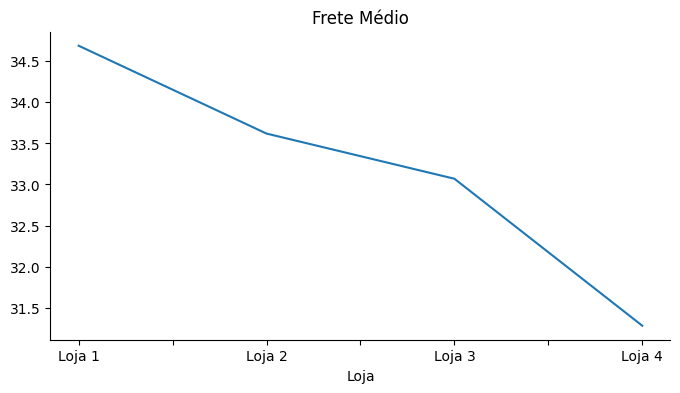

In [85]:
from matplotlib import pyplot as plt
df_frete_medio['Frete Médio'].plot(kind='line', figsize=(8, 4), title='Frete Médio')
plt.gca().spines[['top', 'right']].set_visible(False)

# 6. Avaliando o faturamento mensal

Este trecho tem como objetivo analisar e visualizar o faturamento mensal de cada loja de acordo com a média de vendas. Ele processa os dados, organiza-os por mês e ano, e então gera gráficos de linhas para mostrar a evolução do faturamento ao longo do tempo.


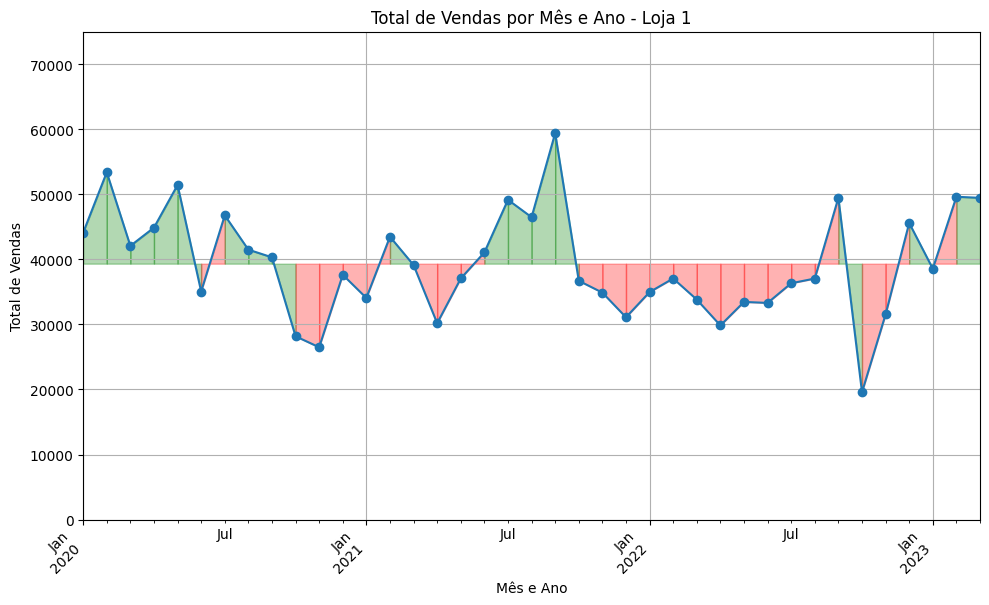

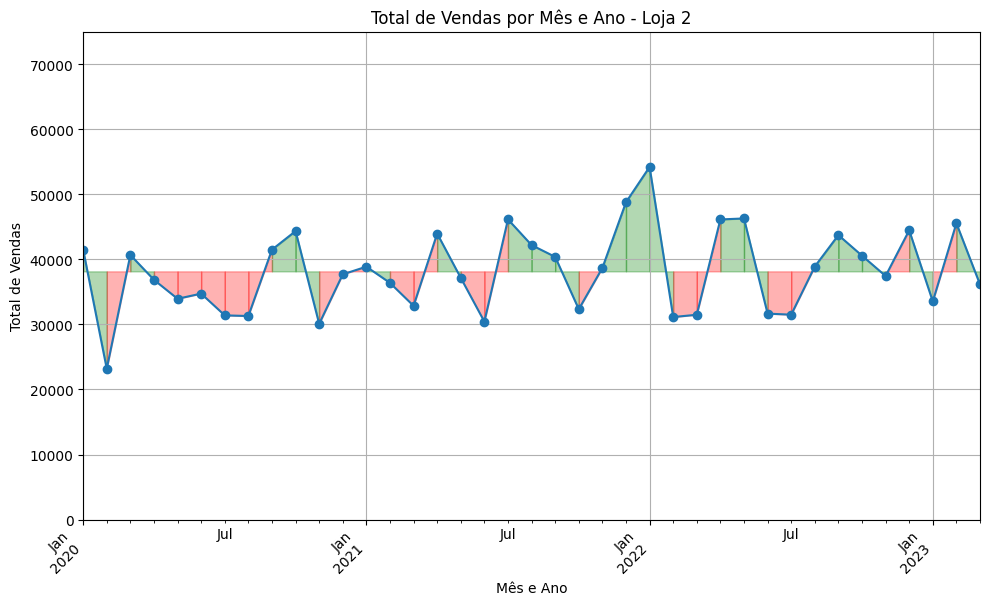

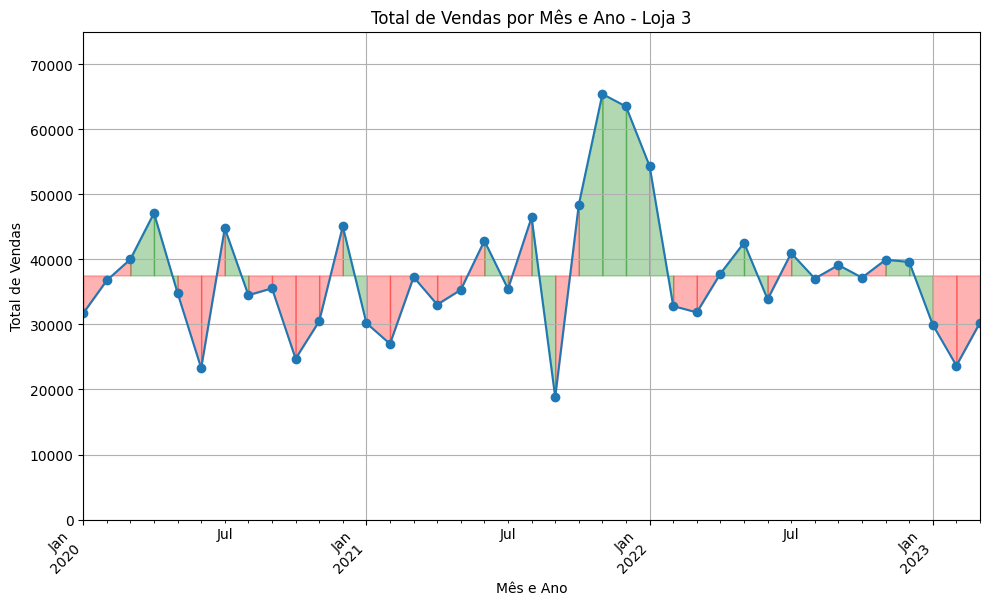

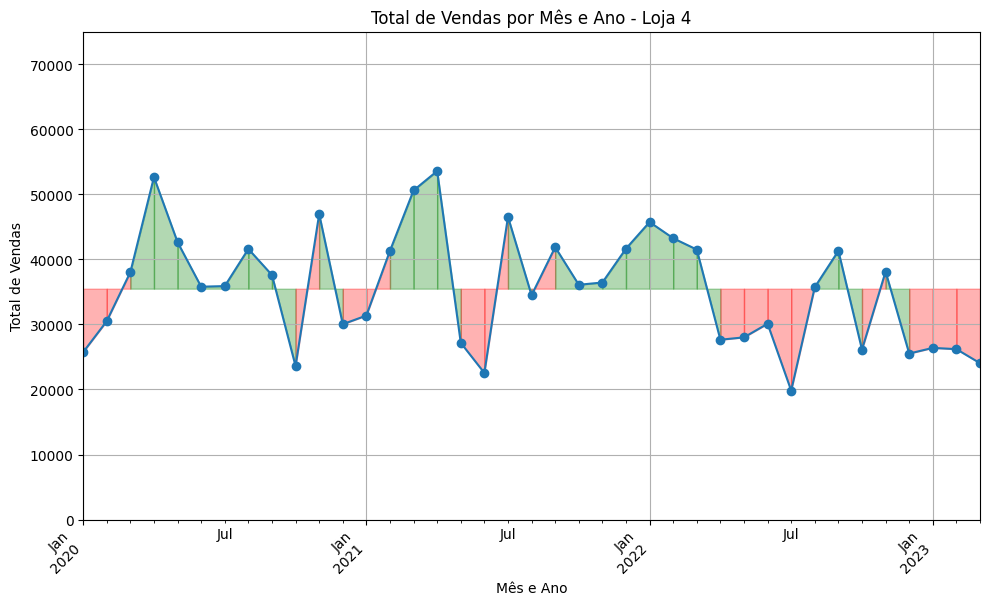

In [86]:
total_vendas_por_mes_ano_por_loja = {}

for i, loja in enumerate(lojas, 1):
    loja['Data da Compra'] = pd.to_datetime(loja['Data da Compra'], format='%d/%m/%Y')
    loja['MesAno'] = loja['Data da Compra'].dt.to_period('M')  # Criando coluna 'MesAno'
    total_vendas_por_mes_ano = loja.groupby('MesAno')['Preço'].sum()
    total_vendas_por_mes_ano_por_loja[f'Loja {i}'] = total_vendas_por_mes_ano

df_total_vendas_por_mes_ano = pd.DataFrame(total_vendas_por_mes_ano_por_loja)

# Criando um gráfico de linhas para cada loja
for loja in df_total_vendas_por_mes_ano.columns:
    plt.figure(figsize=(10, 6))  # Cria uma nova figura para cada loja
    df_total_vendas_por_mes_ano[loja].plot(kind='line', marker='o')  # Plota a linha com marcadores

    x_values = df_total_vendas_por_mes_ano.index
    y_values = df_total_vendas_por_mes_ano[loja]
    media = y_values.mean()

    # Preenchimento colorido com lógica corrigida e acesso por .iloc
    for i in range(len(x_values) - 1):
        if y_values.iloc[i] >= media:  # Usando .iloc para acessar por posição
            plt.fill_between([x_values[i], x_values[i+1]], [y_values.iloc[i], y_values.iloc[i+1]], media, color='green', alpha=0.3)
        else:
            plt.fill_between([x_values[i], x_values[i+1]], [y_values.iloc[i], y_values.iloc[i+1]], media, color='red', alpha=0.3)

    plt.title(f'Total de Vendas por Mês e Ano - {loja}')  # Define o título do gráfico
    plt.xlabel('Mês e Ano')
    plt.ylabel('Total de Vendas')
    plt.ylim(0, 75000)
    plt.grid(True)  # Adiciona uma grade ao gráfico
    plt.tight_layout()
    plt.xticks(rotation=45, ha='right')
    plt.show()

Segue o relatório reescrito com linguagem mais objetiva, estruturada e fluída, preservando todos os dados e conclusões originais, mas tornando a leitura mais clara e profissional:

---

# Relatório de Análise de Desempenho – Alura Store

**Prezado Sr. João,**

Este documento apresenta uma análise detalhada do desempenho das quatro lojas sob sua gestão. O objetivo é fornecer informações estratégicas que auxiliem na decisão sobre qual loja vender, considerando indicadores como faturamento, produtos mais vendidos, satisfação dos clientes, custo de frete, ticket médio e evolução mensal das vendas.

---

## 1. Faturamento Total

* **Loja 1** – R\$ 1.534.509,12 (maior faturamento, desempenho superior)
* **Loja 2** – R\$ 1.488.459,06
* **Loja 3** – R\$ 1.464.025,03
* **Loja 4** – R\$ 1.384.497,58 (menor faturamento)

**Análise:**
A Loja 1 se destaca financeiramente, possivelmente devido à localização estratégica, variedade de produtos ou atratividade da oferta. Lojas 2 e 3 possuem faturamento próximo ao da líder, enquanto a Loja 4 apresenta desempenho inferior, demandando investigação e ações corretivas.

---

## 2. Produtos Mais e Menos Vendidos

A análise do mix de produtos permitiu identificar itens de maior e menor saída em cada unidade.

**Análise:**

* Os produtos mais vendidos revelam tendências de consumo e podem guiar ajustes de estoque.
* Itens com baixa saída indicam necessidade de revisar estratégias de marketing, precificação ou considerar sua retirada do portfólio.
* Uma análise segmentada por categoria pode otimizar a oferta de acordo com o perfil de cada loja.

---

## 3. Avaliação Média dos Clientes

* **Loja 3** – 4,05 (melhor avaliação)
* **Loja 2** – 4,04
* **Loja 4** – 4,00
* **Loja 1** – 3,98 (menor avaliação)

**Análise:**
A Loja 3 lidera em satisfação, refletindo qualidade no atendimento e produtos. Lojas 2 e 4 também mantêm boas notas, enquanto a Loja 1 apresenta menor avaliação, o que sugere melhorias necessárias no atendimento ou na experiência geral do cliente.

---

## 4. Custo Médio de Frete

* **Loja 4** – R\$ 31,28 (menor custo)
* **Loja 3** – R\$ 33,07
* **Loja 2** – R\$ 33,62
* **Loja 1** – R\$ 34,69 (maior custo)

**Análise:**
O menor custo de frete da Loja 4 é um atrativo potencial para clientes sensíveis a preço. As Lojas 2 e 3 mantêm valores competitivos, enquanto o custo mais elevado da Loja 1 pode afetar compras de menor valor.

---

## 5. Ticket Médio

* **Loja 1** – R\$ 650,49 (maior ticket médio)
* **Loja 2** – R\$ 630,97
* **Loja 3** – R\$ 620,61
* **Loja 4** – R\$ 587,15 (menor ticket médio)

**Análise:**
O ticket médio mais alto da Loja 1 indica clientes de maior poder aquisitivo ou foco em produtos de maior valor agregado. Loja 4 apresenta o menor valor, sugerindo necessidade de estratégias para aumentar o gasto por compra (up-selling e cross-selling).

---

## 6. Faturamento Mensal

A análise mensal evidenciou:

* **Loja 4** – Queda acentuada nos últimos 4 meses, com faturamento entre R\$ 20 mil e R\$ 30 mil.
* **Loja 1** – Crescimento consistente ao longo do ano.
* **Lojas 2 e 3** – Desempenho estável.

**Análise:**
O monitoramento mensal é fundamental para detectar tendências e agir rapidamente com ajustes de estoque, promoções ou realocação de recursos.

---

## Conclusão Geral

A **Loja 4** apresenta:

* **Menor faturamento total**
* **Menor ticket médio**
* **Segunda pior avaliação média**
* **Tendência de queda nas vendas** nos últimos meses
* Único ponto positivo: **menor custo de frete**, que não tem se convertido em melhores resultados de vendas.

---

## Recomendação Final

Com base nos indicadores analisados, **recomendo a venda da Loja 4**. Apesar do frete mais competitivo, seu desempenho comercial e financeiro está aquém das demais, apresentando sinais de queda contínua no faturamento e baixo valor médio por compra, o que reduz sua viabilidade a longo prazo.



## Comparativo entre as Lojas:

| Loja   | Faturamento Total | Avaliação Média | Frete Médio | Ticket Médio |
|--------|-------------------|------------------|--------------|---------------|
| Loja 1 | R\$ 1.534.509,12  | 3.98             | R\$ 34,69    | R\$ 650,49    |
| Loja 2 | R\$ 1.488.459,06  | 4.04             | R\$ 33,62    | R\$ 630,97    |
| Loja 3 | R\$ 1.464.025,03  | 4.05             | R\$ 33,07    | R\$ 620,61    |
| Loja 4 | R\$ 1.384.497,58  | 4.00             | R\$ 31,28    | R\$ 587,15    |

